# Función de Distribución Acumulativa Empírica Personalizada (ECDF)

Este script define y utiliza una función de distribución acumulativa empírica personalizada (ECDF) para un conjunto dado de datos. Posteriormente, grafica la ECDF y muestra los puntos de discontinuidad.

ECDF for max(datos): 0.9 
Estadístico Kolmogorov-Smirnov:  0.0835662[1] 0.1164338
[1] 331
[1] 18
[1] 18
[1] 0.1164338
[1] 0.2


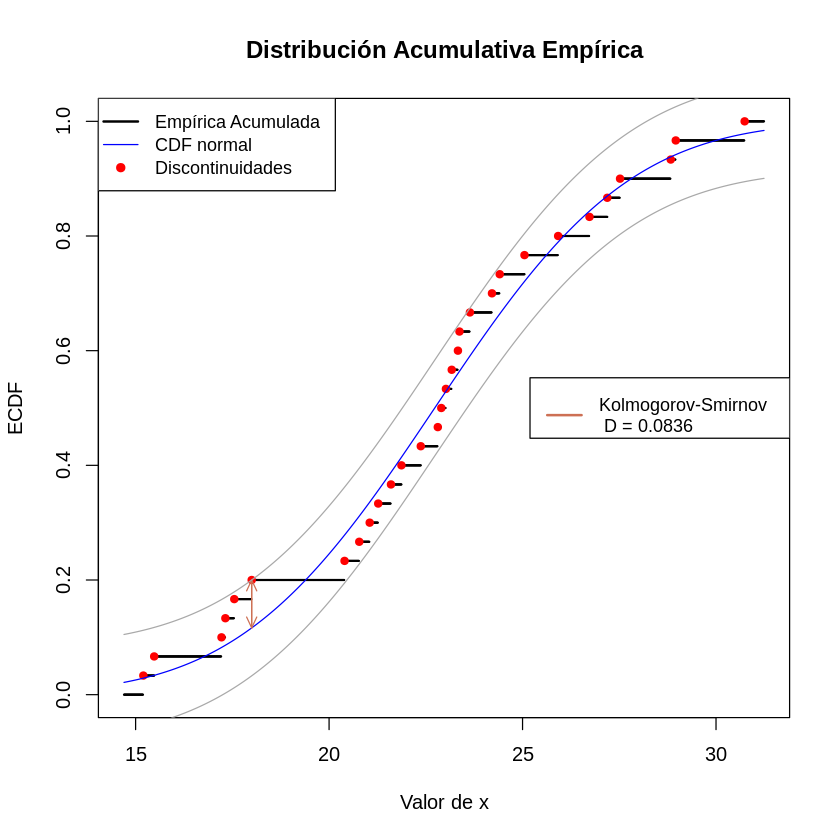

In [1]:
custom_ecdf <- function(x, datos)
{
  e_cdf <- sum(datos <= x) / length(datos)
  return(e_cdf)
}

datos <- c(23.37, 21.87, 24.41, 21.27, 23.33, 15.20, 24.21, 27.52, 15.48, 27.19,
           25.05, 20.40, 21.05, 28.83, 22.90, 18.00, 17.55, 25.92, 23.64, 28.96,
           23.02, 17.32, 30.74, 26.73, 17.22, 22.81, 20.78, 23.17, 21.60, 22.37)

x_bar <- mean(datos)
s <- sd(datos)

datosOrdenados <- sort(datos)

ecdf_valor <- custom_ecdf(28, datos)
cat("ECDF for max(datos):", ecdf_valor, "\n")

rango <- seq(min(datos)-0.5,max(datos)+0.5,0.01)

#Calculamos los valores de la empírica
valores_ECDF <- sapply(rango, function(x) custom_ecdf(x, datos))

#Graficar ECDF
plot(rango, valores_ECDF, type = 'p', xlab = 'Valor de x', ylab = 'ECDF', pch = 19,
     main = 'Distribución Acumulativa Empírica', cex = 0.1)

#Encontramos los puntos de discontinuidad:
discontinuidades <- unique(datosOrdenados)
discontinuidades_ecdf <- sapply(discontinuidades, function(x) custom_ecdf(x, datos))

points(discontinuidades, discontinuidades_ecdf,
       pch = 19, col = "red", cex = 0.8)

normal_P <- pnorm(rango, mean = x_bar, sd = s)

lines(rango,normal_P, col = "blue") #CDF Normal, predicción

legend("topleft", legend = c("Empírica Acumulada", "CDF normal", "Discontinuidades"),
       col = c("black", "blue", "red"), pch = c(NA, NA, 19), lty = c(1, 1, 0),
       cex = c(0.9,0.9,0.9), lwd = c(2,1,1))


#Diferencia entre funciones:
diferencia <- abs(normal_P - valores_ECDF)
D <- max(diferencia)
cat("Estadístico Kolmogorov-Smirnov: ", D)
posicion_max_Dif <- which.max(diferencia) #Encuentra la posición del máximo

legend("right",
       legend = paste("Kolmogorov-Smirnov \n D =", round(D, 4)),
       col = c("#CD7054"), lty = 1,
       cex = 0.9, lwd = 2)

print(normal_P[posicion_max_Dif])
print(posicion_max_Dif)
print(rango[posicion_max_Dif])
#abline(v = rango[posicion_max_Dif], col = "red", lty = 2)

x <- rango[posicion_max_Dif]
y1 <- normal_P[posicion_max_Dif]
y2 <- valores_ECDF[posicion_max_Dif]
print(x)
print(y1)
print(y2)

arrows(x, y1, x, y2, length = 0.1, angle = 25, code = 1, col = "#CD7054")
arrows(x, y2, x, y1, length = 0.1, angle = 25, code = 1, col = "#CD7054")


l_band <- normal_P - D
u_band <- normal_P + D

lines(rango,l_band, col = "darkgrey")
lines(rango,u_band, col = "darkgrey")






# Gráfico Cuantil-Cuantil (Q-Q) para Distribución Normal

Este script genera un gráfico Q-Q para comparar un conjunto dado de datos con una distribución normal teórica. También calcula y grafica bandas de confianza para ayudar a evaluar la adherencia de los datos a la distribución normal.

Warning message in qnorm(pnorm(datosNormalizados) + D):
“NaNs produced”
Warning message in qnorm(pnorm(datosNormalizados) - D):
“NaNs produced”


NULL

Warning message in qnorm(pnorm(datosNormalizados) + D):
“NaNs produced”
Warning message in qnorm(pnorm(datosNormalizados) - D):
“NaNs produced”


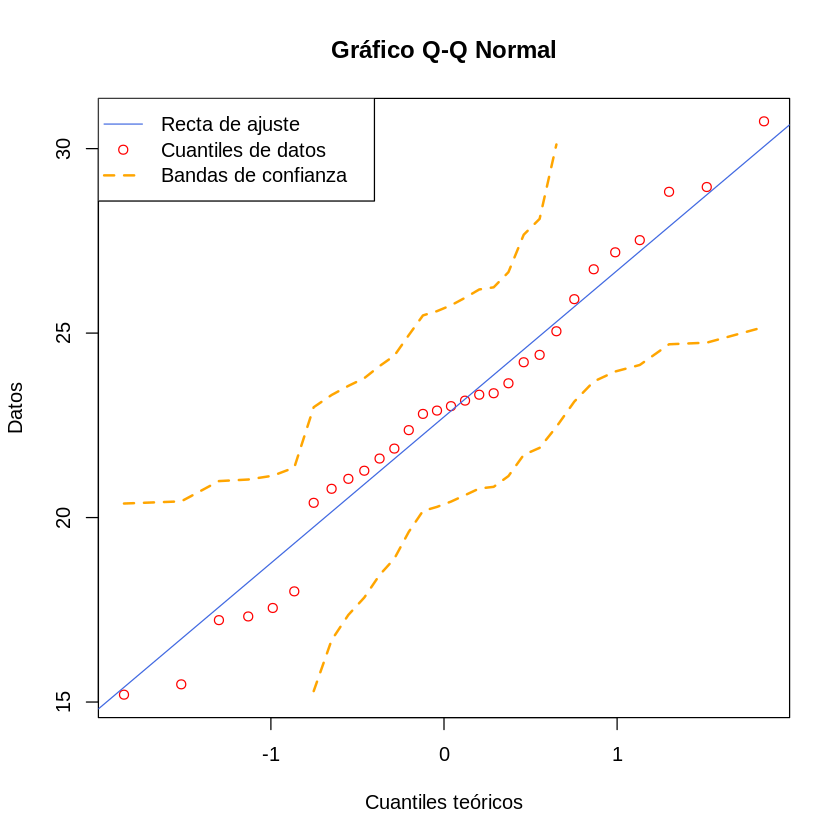

NULL

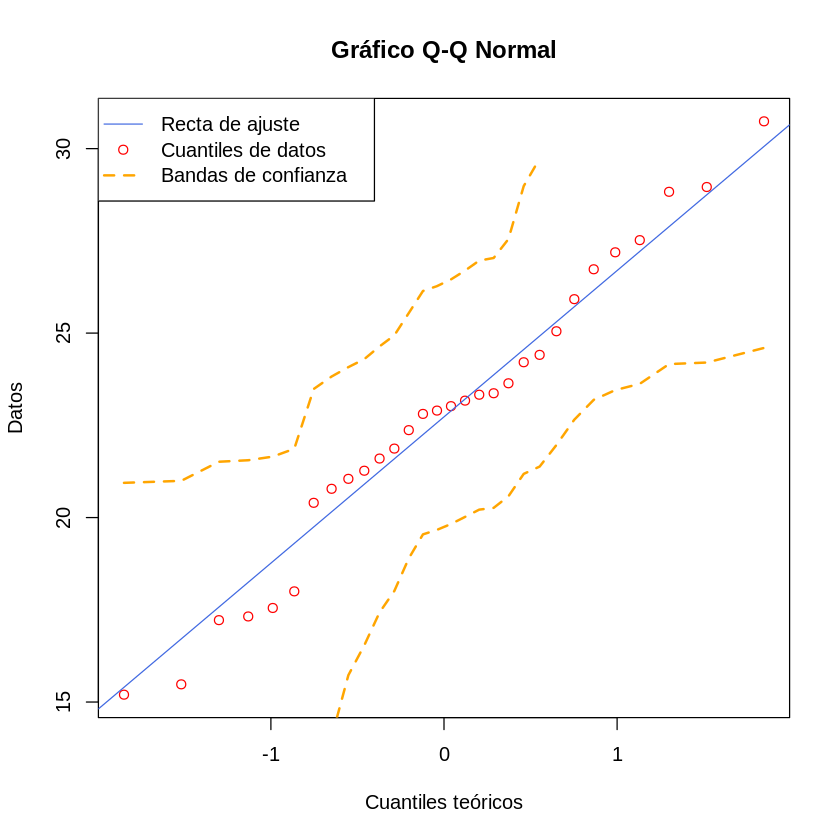

In [2]:
qq_normal <- function(datos, alpha)
{
  # Ordenamos los datos
  datos_ordenados <- sort(datos)
  s <- sd(datos)        # Obtenemos desviación y media para escalar y trasladar
  x_bar <- mean(datos)

  datosNormalizados <- (datos_ordenados - x_bar) / s # Escalamos y trasladamos los datos

  n <- length(datos)
  # Calcular los cuantiles observados
  cuantiles_observados <- (1:n) / (n + 1)

  # Predicción cuantil de la normal (inversa de la acumulada):
  cuantiles_esperados <- qnorm(cuantiles_observados)

  D <- sqrt(-log(alpha / 2) / (2 * n)) #Estadístico de kolmogorov-Smirnov

  upper_band <- qnorm(pnorm(datosNormalizados) + D)*s + x_bar #Multiplicamos para reescalar
  lower_band <- qnorm(pnorm(datosNormalizados) - D)*s + x_bar # y trasladar las bandas

  plot(cuantiles_esperados, datos_ordenados,
       xlab = "Cuantiles teóricos",
       ylab = "Datos",
       main = "Gráfico Q-Q Normal",
       col = "red",
       lty = 1)

  lines(cuantiles_esperados, upper_band, col = "orange", lty = 2, lwd = 2)
  lines(cuantiles_esperados, lower_band, col = "orange", lty = 2, lwd = 2)

  abline(a = x_bar, b = s, col = "royalblue", lty = 1) # juste

  legend("topleft", legend = c("Recta de ajuste", "Cuantiles de datos","Bandas de confianza"),
         col = c("royalblue","red","orange"), pch = c(NA, 1, NA), lty = c(1,0,2), lwd = c(1,1,2))

  return(NULL)
}

datos <- c(23.37, 21.87, 24.41, 21.27, 23.33, 15.20, 24.21, 27.52, 15.48, 27.19,
           25.05, 20.40, 21.05, 28.83, 22.90, 18.00, 17.55, 25.92, 23.64, 28.96,
           23.02, 17.32, 30.74, 26.73, 17.22, 22.81, 20.78, 23.17, 21.60, 22.37)

qq_normal(datos, 0.05)
qq_normal(datos, 0.01)


# PP-Plot para Distribución Normal

Este script define y utiliza una función para generar un PP-Plot (Probability-Probability Plot) que compara las probabilidades empíricas y teóricas (Normal) de un conjunto dado de datos. El gráfico resultante ayuda a evaluar visualmente si los datos siguen una distribución normal.

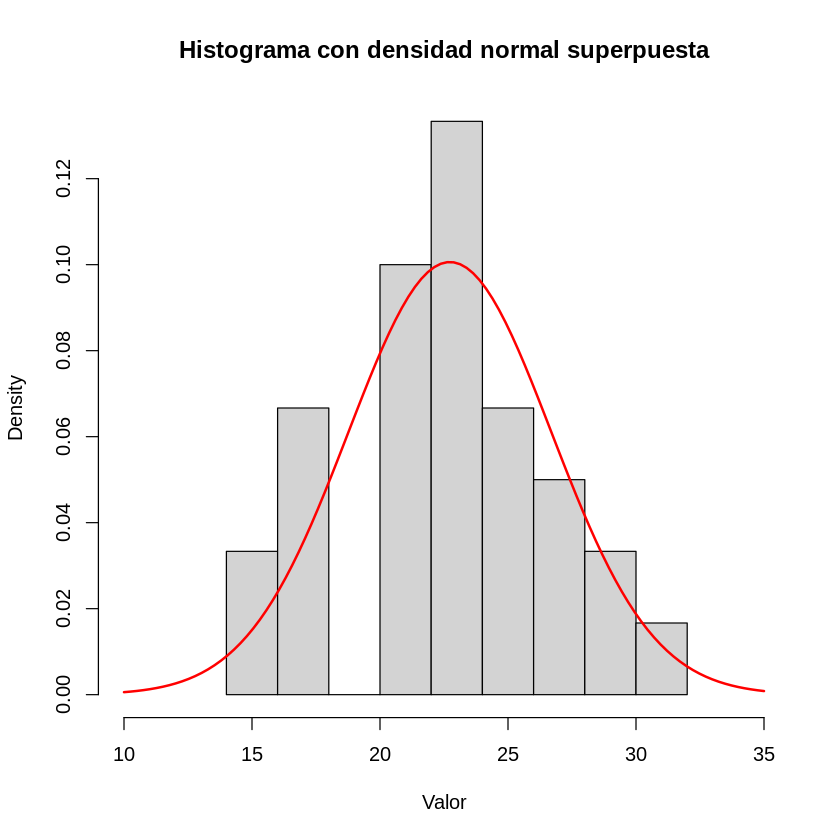

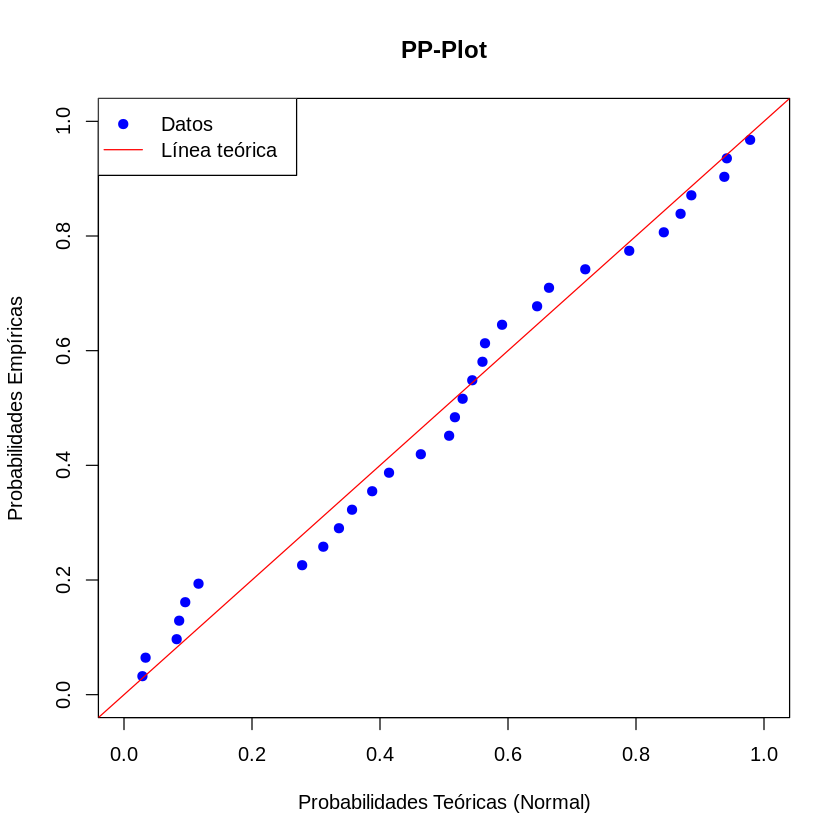

In [3]:
pp_plot <- function(data) {
  # Ordenar datos
  datos_ordenados <- sort(data)

  n <- length(data)
  probabilidades_empiricas <- (1:n) / (n + 1)

  probabilidades_teoricas <- pnorm(datos_ordenados, mean(data), sd(data))

  plot(probabilidades_teoricas, probabilidades_empiricas,
       xlab = "Probabilidades Teóricas (Normal)",
       ylab = "Probabilidades Empíricas",
       main = "PP-Plot",
       pch = 19, col = "blue", xlim = c(0, 1), ylim = c(0, 1))
  abline(0, 1, col = "red")

  legend("topleft", legend = c("Datos", "Línea teórica"),
         col = c("blue", "red"), pch = c(19, NA), lty = c(NA, 1))
}

# Datos
datos <- c(23.37, 21.87, 24.41, 21.27, 23.33, 15.20, 24.21, 27.52, 15.48, 27.19,
           25.05, 20.40, 21.05, 28.83, 22.90, 18.00, 17.55, 25.92, 23.64, 28.96,
           23.02, 17.32, 30.74, 26.73, 17.22, 22.81, 20.78, 23.17, 21.60, 22.37)


hist(datos, freq=FALSE, breaks=10, xlim=c(10,35), main="Histograma con densidad normal superpuesta", xlab="Valor")

x <- seq(10, 35, length=100)
y <- dnorm(x, mean(datos), sd(datos))

lines(x, y, col="red", lwd=2)

pp_plot(datos)
